# Desafio Cognitivo

In [1]:
# Importando os pacotes necessários
import re
import numpy as np
import pandas as pd
import seaborn as sns
from glob import glob
from collections import defaultdict
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
# Fazendo a leitura do CSV e exibindo algumas informações relevantes
df = pd.read_csv('dados/listings.csv')
display(df.head(3))
print(df.columns)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20211224070558,2021-12-25,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,https://www.airbnb.com/users/show/68997,...,4.9,4.76,4.66,NaN,f,1,1,0,0,1.92
1,24480,https://www.airbnb.com/rooms/24480,20211224070558,2021-12-25,"Nice and cozy near Ipanema Beach, w/ home office","My studio is located in the best of Ipanema, t...","The beach, the lagoon, Ipanema is a great loca...",https://a0.muscache.com/pictures/11955612/b28e...,99249,https://www.airbnb.com/users/show/99249,...,4.9,4.97,4.58,NaN,f,1,1,0,0,0.62
2,25026,https://www.airbnb.com/rooms/25026,20211224070558,2021-12-25,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/3003965/68ebb...,102840,https://www.airbnb.com/users/show/102840,...,4.9,4.81,4.56,NaN,f,1,1,0,0,1.69


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [3]:
# Avaliar os tipos de cada atributo, assim como informações de dados nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24549 entries, 0 to 24548
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24549 non-null  int64  
 1   listing_url                                   24549 non-null  object 
 2   scrape_id                                     24549 non-null  int64  
 3   last_scraped                                  24549 non-null  object 
 4   name                                          24528 non-null  object 
 5   description                                   23336 non-null  object 
 6   neighborhood_overview                         13212 non-null  object 
 7   picture_url                                   24549 non-null  object 
 8   host_id                                       24549 non-null  int64  
 9   host_url                                      24549 non-null 

In [4]:
# Verificar se há dados duplicados
df.duplicated().sum()

0

In [5]:
# Removendo alguns atributos específicos não relevantes
df.drop(['id',
        'listing_url',
        'scrape_id',
        'last_scraped',
        'picture_url',
        'host_url',
        'host_name',
        'host_since',
        'host_location',
        'host_about',
        'host_response_time',
        'host_response_rate',
        'host_acceptance_rate',
        'host_is_superhost',
        'host_thumbnail_url',
        'host_picture_url',
        'host_neighbourhood',
        'host_listings_count',
        'host_total_listings_count',
        'host_verifications',
        'host_has_profile_pic',
        'host_identity_verified',
        'neighbourhood_group_cleansed',
        'bathrooms',
        'minimum_minimum_nights',
        'maximum_minimum_nights',
        'minimum_maximum_nights',
        'maximum_maximum_nights',
        'minimum_nights_avg_ntm',
        'maximum_nights_avg_ntm',
        'calendar_updated',
        'has_availability',
        'calendar_last_scraped',
        'first_review',
        'last_review',
        'license',
        'instant_bookable',
        'calculated_host_listings_count',
        'calculated_host_listings_count_entire_homes',
        'calculated_host_listings_count_private_rooms',
        'calculated_host_listings_count_shared_rooms'], axis=1, inplace=True)

In [6]:
# Removendo caracteres especiais da coluna de precos, e transformando a de banheiros em texto para ser manipulada
df['price'] = [float(x[1:].replace(',','')) for x in df['price']]
df['bathrooms_text'] = df['bathrooms_text'].astype('str')

## Análise exploratória

In [47]:
# Análise estatística básica
df.describe()

,neighbourhood_cleansed,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,review_scores_rating,bath,bath_type
count,14359.000000,14359.000000,14359.000000,14359.000000,14359.000000,14359.000000,14359.000000,14359.000000,14359.000000,14359.000000,14359.000000,14359.000000,14359.000000,14359.000000,14359.000000,14359.000000
mean,52.697333,22.646702,0.492653,4.123268,1.631242,2.621283,804.403649,3.969845,623.078418,12.014625,30.744899,50.317432,200.610279,4.623016,1.600460,0.128700
std,34.984350,13.570899,0.888747,2.367859,0.993867,2.126789,2968.201161,16.749816,690.154024,10.636751,21.292010,30.325760,130.507630,0.872296,0.984934,0.334879
min,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,33.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,16.000000,0.000000,2.000000,1.000000,1.000000,235.000000,2.000000,60.000000,1.000000,10.000000,25.000000,77.000000,4.670000,1.000000,0.000000
50%,34.000000,16.000000,0.000000,4.000000,1.000000,2.000000,431.000000,2.000000,900.000000,10.000000,32.000000,55.000000,203.000000,4.890000,1.000000,0.000000
75%,70.000000,18.000000,0.000000,5.000000,2.000000,3.000000,800.000000,3.000000,1125.000000,22.000000,52.000000,79.000000,335.000000,5.000000,2.000000,0.000000
max,152.000000,80.000000,3.000000,16.000000,20.000000,50.000000,129080.000000,1000.000000,47036.000000,30.000000,60.000000,90.000000,365.000000,5.000000,20.000000,1.000000


In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x='room_type', y='price', data=df)
plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Tipo de quarto versus preço")
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Quantidade de anúncios por tipo de quarto')
df.room_type.value_counts().plot(kind='bar')
plt.xlabel('Room type')
plt.ylabel('Samples')
plt.show()

In [ ]:
plt.figure(figsize=(30,5))
plt.title('Quantidade de anúncios por região')
df.neighbourhood_cleansed.value_counts().plot(kind='bar')
plt.xlabel('Neighbourhood')
plt.ylabel('Samples')
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Anúncios por região - 5 bairros mais presentes')
df.neighbourhood_cleansed.value_counts()[:5].plot(kind='bar')
plt.xlabel('Neighbourhood')
plt.ylabel('Samples')
plt.show()

In [ ]:
n_maiores = 20
df.sort_values(by='price', ascending=False).head(n_maiores).plot.scatter(x='neighbourhood_cleansed',y='price', rot=90)
plt.xlabel("Neighbourhood", size=13)
plt.ylabel("Price", size=13)
plt.title(f"Bairros dos {n_maiores} quartos mais caros")
plt.show()

In [ ]:
n_menores = 20
df.sort_values(by='price', ascending=True).head(n_menores).plot.scatter(x='neighbourhood_cleansed',y='price', rot=90)
plt.xlabel("Neighbourhood", size=13)
plt.ylabel("Price", size=13)
plt.title(f"Bairros dos {n_menores} quartos mais baratos")
plt.show()

In [ ]:
top_bairros = 5
plt.figure(figsize=(5,5))
df[df['neighbourhood_cleansed'].isin(df.neighbourhood_cleansed.value_counts()[:top_bairros].index.to_list())].plot.scatter(x='neighbourhood_cleansed', y='price', rot=90)
plt.xlabel("Neighbourhood", size=13)
plt.ylabel("Price", size=13)
plt.title(f"Variação de preço dos {top_bairros} bairros mais anunciados")
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x='room_type', y='minimum_nights', data=df)
plt.xlabel("Room Type", size=13)
plt.ylabel("Minimum nights", size=13)
plt.title("Relação entre tipo de quarto e quantidade mínima de noites")
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x='room_type', y='maximum_nights', data=df)
plt.xlabel("Room Type", size=13)
plt.ylabel("Maximum nights", size=13)
plt.title("Relação entre tipo de quarto e quantidade máxima de noites")
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df[df['neighbourhood_cleansed'].isin(df.neighbourhood_cleansed.value_counts()[:top_bairros].index.to_list())], x='neighbourhood_cleansed',y='availability_30', palette='pastel')
plt.xlabel("Bairros", size=13)
plt.ylabel("Disponibilidade em 30 dias", size=13)
plt.title("Boxplot - Bairros versus disponibilidade")
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df[df['neighbourhood_cleansed'].isin(df.neighbourhood_cleansed.value_counts()[:top_bairros].index.to_list())], x='neighbourhood_cleansed',y='availability_60',palette='pastel')
plt.xlabel("Bairros", size=13)
plt.ylabel("Disponibilidade em 60 dias", size=13)
plt.title("Boxplot - Bairros versus disponibilidade")
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df[df['neighbourhood_cleansed'].isin(df.neighbourhood_cleansed.value_counts()[:top_bairros].index.to_list())], x='neighbourhood_cleansed',y='availability_90',palette='pastel')
plt.xlabel("Bairros", size=13)
plt.ylabel("Disponibilidade em 90 dias", size=13)
plt.title("Boxplot - Bairros versus disponibilidade")
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df[df['neighbourhood_cleansed'].isin(df.neighbourhood_cleansed.value_counts()[:top_bairros].index.to_list())], x='neighbourhood_cleansed',y='availability_365',palette='pastel')
plt.xlabel("Bairros", size=13)
plt.ylabel("Disponibilidade em 365 dias", size=13)
plt.title("Boxplot - Bairros versus disponibilidade")
plt.xticks(rotation=90)
plt.show()

In [ ]:
n_avaliacoes = 20
df.sort_values(by='number_of_reviews', ascending=False).head(n_avaliacoes).plot.scatter(x='neighbourhood_cleansed',y='number_of_reviews', rot=90)
plt.xlabel("Neighbourhood", size=13)
plt.ylabel("Avaliações", size=13)
plt.title(f"Bairros dos {n_avaliacoes} quartos mais avaliados")
plt.show()

In [ ]:
n_avaliacoes_mes = 20
df.sort_values(by='reviews_per_month', ascending=False).head(n_avaliacoes_mes).plot.scatter(x='neighbourhood_cleansed',y='reviews_per_month', rot=90)
plt.xlabel("Neighbourhood", size=13)
plt.ylabel("Avaliações", size=13)
plt.title(f"Bairros dos {n_avaliacoes_mes} quartos mais avaliados por mês")
plt.show()

In [ ]:
df[df['review_scores_rating'] == 5].neighbourhood_cleansed.value_counts()[:top_bairros].plot(kind='bar', rot=90)
plt.xlabel("Neighbourhood", size=13)
plt.ylabel("Avaliações", size=13)
plt.title(f"Top 5 bairros com avaliações 5 estrelas")
plt.show()

In [ ]:
df[df['review_scores_rating'] == 0].neighbourhood_cleansed.value_counts()[:top_bairros].plot(kind='bar', rot=90)
plt.xlabel("Neighbourhood", size=13)
plt.ylabel("Avaliações", size=13)
plt.title(f"Top 5 bairros com avaliações 0 estrelas")
plt.show()

In [ ]:
df[df['review_scores_rating'] == 5].host_id.value_counts()[:5].plot(kind='bar', rot=90)
plt.xlabel("Usuários", size=13)
plt.ylabel("Avaliações", size=13)
plt.title(f"Usuários com anúncios melhor avaliados")
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df[df['host_id'].isin(df[df['review_scores_rating'] == 5].host_id.value_counts()[:5].index.to_list())], x='host_id',y='review_scores_rating',palette='pastel')
plt.xlabel("Usuários", size=13)
plt.ylabel("Avaliações", size=13)
plt.title(f"Usuários com anúncios melhor avaliados")
plt.xticks(rotation=90)
plt.show()

In [ ]:
df[df['review_scores_rating'] == 0].host_id.value_counts()[:5].plot(kind='bar', rot=90)
plt.xlabel("Usuários", size=13)
plt.ylabel("Avaliações", size=13)
plt.title(f"Usuários com anúncios pior avaliados")
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df[df['host_id'].isin(df[df['review_scores_rating'] == 0].host_id.value_counts()[:5].index.to_list())], x='host_id',y='review_scores_rating',palette='pastel')
plt.xlabel("Usuários", size=13)
plt.ylabel("Avaliações", size=13)
plt.title(f"Usuários com anúncios pior avaliados")
plt.xticks(rotation=90)
plt.show()

In [7]:
# Removendo atributos adicionais que foram úteis para análise exploratória
df.drop(['name',
        'description',
        'neighborhood_overview',
        'host_id',
        'neighbourhood',
        'latitude',
        'longitude',
        'number_of_reviews',
        'number_of_reviews_ltm',
        'number_of_reviews_l30d',
        'review_scores_accuracy',
        'review_scores_cleanliness',
        'review_scores_checkin',
        'review_scores_communication',
        'review_scores_location',
        'review_scores_value',
        'reviews_per_month'], axis=1, inplace=True)

In [9]:
# Extraindo informação relevante do campo texto
df['bathrooms_text'] = df['bathrooms_text'].str.lower().apply(lambda x: re.sub('[ ]*bath[s]*','',(' '.join(x.lower().replace('half-', '0.5').split()[::-1]) if 'half-' in x else x)))

In [10]:
# Convertendo para banheiro privativo ou não (assumindo campos não especificados como banheiro privativo)
df_temp = pd.DataFrame(df['bathrooms_text'].str.split().to_list(), columns=['bath', 'bath_type'])
df_temp.loc[df_temp.bath_type != 'shared', 'bath_type'] = 'private'

In [11]:
# Concatenando ao dataframe
df = pd.concat([df, df_temp], axis=1)

In [12]:
# Atributo que possui informações bem relevantes, mas exige uma maior atenção para ser utilizada
df.drop(['amenities'], axis=1, inplace=True)

In [13]:
# Removendo atributo textual
df.drop(['bathrooms_text'], axis=1, inplace=True)
df['bath'] = df['bath'].astype('float32')

In [14]:
# Fazendo o encoding dos atributos não numéricos
dd = defaultdict(LabelEncoder)

fit = df.select_dtypes(include='object').apply(lambda x: dd[x.name].fit_transform(x))

In [15]:
# Para cada coluna, receber o atributo codificado
for col in fit.columns:
    df[col] = fit[col]

In [16]:
# Exibindo dados após a operação
df.head()

,neighbourhood_cleansed,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,review_scores_rating,bath,bath_type
0,34,10,0,5,2.0,2.0,350.0,5,180,0,22,24,257,4.68,1.0,0
1,64,16,0,2,1.0,1.0,296.0,3,90,0,0,0,107,4.73,1.0,0
2,34,16,0,3,1.0,1.0,387.0,3,90,1,10,26,206,4.68,1.0,0
3,64,16,0,2,1.0,1.0,172.0,2,89,0,0,0,207,4.72,1.5,0
4,34,14,0,2,1.0,1.0,260.0,3,15,2,3,8,58,4.89,1.5,0


In [17]:
# Checando os dados novamente
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24549 entries, 0 to 24548
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  24549 non-null  int64  
 1   property_type           24549 non-null  int64  
 2   room_type               24549 non-null  int64  
 3   accommodates            24549 non-null  int64  
 4   bedrooms                23059 non-null  float64
 5   beds                    24202 non-null  float64
 6   price                   24549 non-null  float64
 7   minimum_nights          24549 non-null  int64  
 8   maximum_nights          24549 non-null  int64  
 9   availability_30         24549 non-null  int64  
 10  availability_60         24549 non-null  int64  
 11  availability_90         24549 non-null  int64  
 12  availability_365        24549 non-null  int64  
 13  review_scores_rating    15588 non-null  float64
 14  bath                    24485 non-null

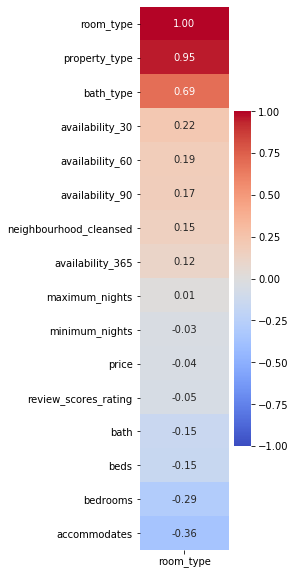

<Figure size 432x288 with 0 Axes>

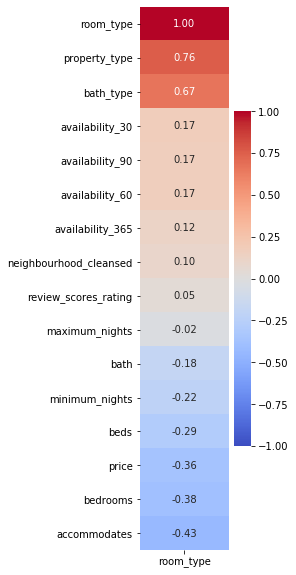

<Figure size 432x288 with 0 Axes>

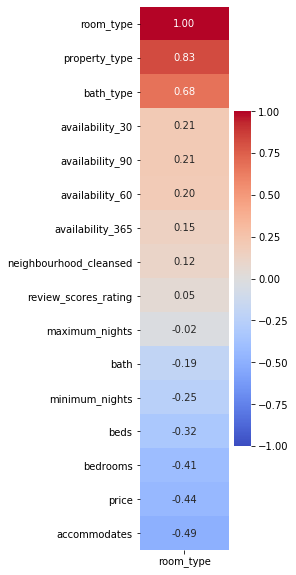

<Figure size 432x288 with 0 Axes>

In [18]:
# Verificar atributos relevantes para o nosso objetivo: classificar o tipo de quarto. Para isso, vamos utilizar a matriz de correlação. Como teste, utilizei os diferentes métodos
for method in ['pearson', 'kendall', 'spearman']:
    correlation = df.corr(method=method)

    plt.figure(figsize=(2, 10))
    sns.heatmap(correlation[['room_type']].sort_values(by='room_type', ascending=False), cmap='coolwarm', annot=True, fmt='.2f', vmin=-1, vmax=1)
    plt.show()
    plt.clf()

## Teste de modelos

In [19]:
# Importando pacotes necessários para o treinamento
import seaborn as sns
import tensorflow as tf
import tensorflow.keras as k
from sklearn.utils import class_weight
from sklearn.model_selection import KFold
from tensorflow.keras.layers import Dense
from xgboost.sklearn import XGBClassifier
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, PrecisionRecallDisplay, precision_recall_curve, roc_curve, auc, average_precision_score

In [20]:
# Removendo dados ausentes 
df.dropna(how='any',inplace=True)

In [22]:
# Separando os dados de treinamento dos rótulos
X = df.iloc[:, [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]]
Y = df['room_type']

In [23]:
# Avaliação inicial para definir hiperparâmetros da rede, dividindo os dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
# Por se tratar de uma base muito desbalanceada, uma das alternativas é atuar nos pesos do treinamento
pesos = compute_class_weight('balanced', np.unique(Y), Y)
pesos = dict(enumerate(pesos))

In [25]:
# Vamos categorizar os dados
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [26]:
# Garatir que o treinamento não seja maior que o necessário
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                  min_delta=0, 
                                                  patience=20, 
                                                  verbose=0,
                                                  mode='auto', 
                                                  baseline=None, 
                                                  restore_best_weights=False
                                                )

In [27]:
# Configuração básica de uma rede MLP
k.backend.clear_session()

num_classes = 4

model = Sequential()
model.add(Dense(20, input_shape=x_train.shape[1:], activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
# Configuração do modelo para treinamento
hist = model.fit(x_train, 
          y_train, 
          epochs=100, 
          batch_size=15, 
          class_weight=pesos,
          callbacks=[early_stopping],
          verbose=0, 
          validation_split=0.5)

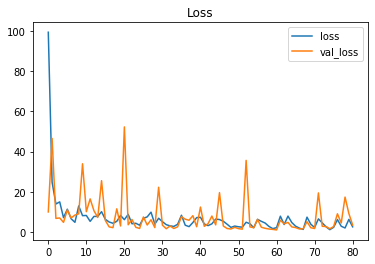

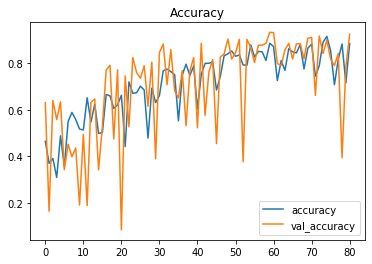

In [29]:
# Plotando gráficos de loss e acurácia
plt.title("Loss")
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.title("Accuracy")
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [30]:
# Convertendo os dados preditos para a matriz de confusão
y_pred = np.argmax(model.predict(x_test), axis=1)

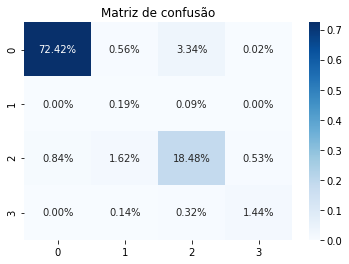

In [31]:
# Apresentando a matriz de confusão
cm = confusion_matrix(np.argmax(y_test.values, axis=1), y_pred) #cmap=plt.cm.Blues
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')
plt.title("Matriz de confusão")
plt.show()

In [32]:
# Convertendo para categórico para avaliarmos o desempenho da rede
y_pred = pd.get_dummies(y_pred)

In [33]:
# Métricas básicas para problema de classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3289
           1       0.07      0.67      0.13        12
           2       0.83      0.86      0.85       925
           3       0.72      0.76      0.74        82

   micro avg       0.93      0.93      0.93      4308
   macro avg       0.65      0.81      0.67      4308
weighted avg       0.95      0.93      0.94      4308
 samples avg       0.93      0.93      0.93      4308



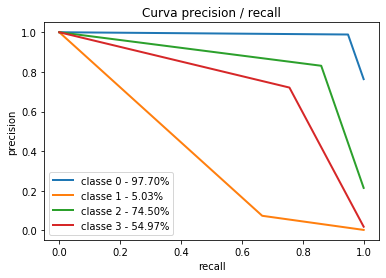

In [34]:
# Curva precision-recall

precision = dict()
recall = dict()
for i in range(4):
    precision[i], recall[i], _ = precision_recall_curve(y_test.iloc[:, i],
                                                        y_pred.iloc[:, i])
    avg_pr = average_precision_score(y_test.iloc[:, i], y_pred.iloc[:, i])
    plt.plot(recall[i], precision[i], lw=2, label=f'classe {i} - {avg_pr*100:.2f}%')
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("Curva precision / recall")
plt.show()

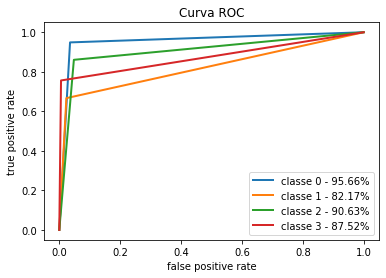

In [35]:
# Curva roc

fpr = dict()
tpr = dict()

for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test.iloc[:, i],
                                  y_pred.iloc[:, i])
    auc_roc = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label=f'classe {i} - {auc_roc*100:.2f}%')

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("Curva ROC")
plt.show()

In [36]:
# Com os hiperparâmetros escolhidos, vamos testar o modelo na generalização com K-Fold
kf = KFold(n_splits=3)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3554
           1       0.01      0.58      0.02        12
           2       0.88      0.33      0.48      1146
           3       0.36      0.72      0.48        75

   micro avg       0.80      0.80      0.80      4787
   macro avg       0.56      0.65      0.49      4787
weighted avg       0.95      0.80      0.84      4787
 samples avg       0.80      0.80      0.80      4787



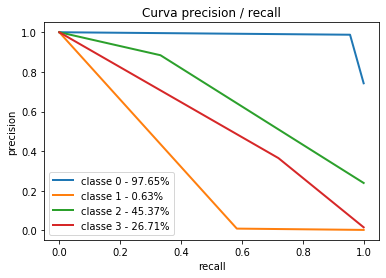

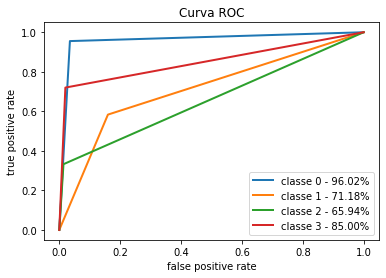

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3478
           1       0.15      0.19      0.17        32
           2       0.86      0.93      0.89      1173
           3       0.62      0.78      0.69       103

   micro avg       0.94      0.94      0.94      4786
   macro avg       0.66      0.71      0.68      4786
weighted avg       0.95      0.94      0.94      4786
 samples avg       0.94      0.94      0.94      4786



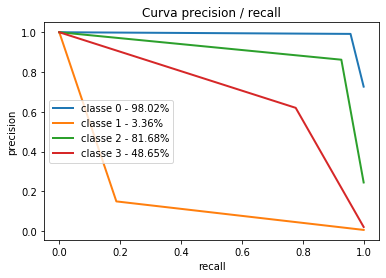

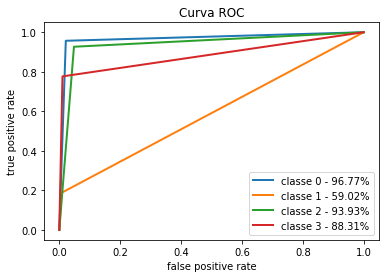

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3887
           1       0.00      0.00      0.00         4
           2       0.87      0.82      0.84       831
           3       0.37      0.91      0.52        64

   micro avg       0.95      0.95      0.95      4786
   macro avg       0.56      0.68      0.59      4786
weighted avg       0.96      0.95      0.95      4786
 samples avg       0.95      0.95      0.95      4786



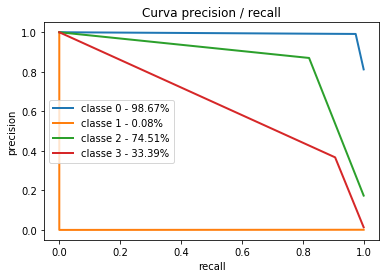

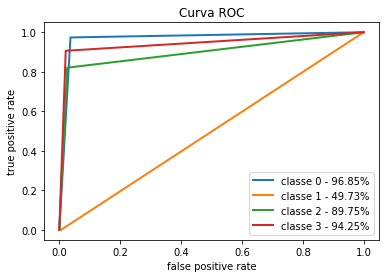

<Figure size 432x288 with 0 Axes>

In [37]:
# Pipeline de avaliação para cada fold
for train_index, test_index in kf.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    y_train = pd.get_dummies(y_train)
    y_test = pd.get_dummies(y_test)
    
    k.backend.clear_session()

    model = Sequential()
    model.add(Dense(20, input_shape=x_train.shape[1:], activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    hist = model.fit(x_train, 
                      y_train, 
                      epochs=100, 
                      batch_size=15, 
                      class_weight=pesos,
                      callbacks=[early_stopping],
                      verbose=0, 
                      validation_split=0.5)
    
    y_pred = pd.get_dummies(np.argmax(model.predict(x_test), axis=1))
    print(classification_report(y_test, y_pred))
    
    # Curva precision-recall

    precision = dict()
    recall = dict()
    for i in range(4):
        precision[i], recall[i], _ = precision_recall_curve(y_test.iloc[:, i],
                                                            y_pred.iloc[:, i])
        avg_pr = average_precision_score(y_test.iloc[:, i], y_pred.iloc[:, i])
        plt.plot(recall[i], precision[i], lw=2, label=f'classe {i} - {avg_pr*100:.2f}%')

    plt.xlabel("recall")
    plt.ylabel("precision")
    plt.legend(loc="best")
    plt.title("Curva precision / recall")
    plt.show()
    plt.clf()
    
    # roc curve
    fpr = dict()
    tpr = dict()

    for i in range(4):
        fpr[i], tpr[i], _ = roc_curve(y_test.iloc[:, i],
                                      y_pred.iloc[:, i])
        auc_roc = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], lw=2, label=f'classe {i} - {auc_roc*100:.2f}%')

    plt.xlabel("false positive rate")
    plt.ylabel("true positive rate")
    plt.legend(loc="best")
    plt.title("Curva ROC")
    plt.show()
    plt.clf()

## Vamos utilizar uma rede de boosting e avaliar o desempenho

In [39]:
# Divisão dos dados
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [40]:
# Criação do classificador com hiperparâmetros default
xgb = XGBClassifier()             
xgb.fit(x_train, y_train)

/home/prabhat/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:54:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [41]:
# Predição
y_pred = xgb.predict(x_test)

In [42]:
# Avaliando métricas
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3289
           1       0.67      0.67      0.67        12
           2       0.99      1.00      0.99       925
           3       0.99      1.00      0.99        82

    accuracy                           1.00      4308
   macro avg       0.91      0.92      0.91      4308
weighted avg       1.00      1.00      1.00      4308



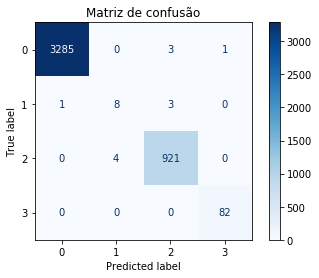

In [43]:
# Plotagem da matriz de confusão
plot_confusion_matrix(xgb, x_test, y_test, cmap=plt.cm.Blues)
plt.title("Matriz de confusão")
plt.show()

In [44]:
# Convertendo para categorical
y_test_dummies = pd.get_dummies(y_test)
y_pred_dummies = pd.get_dummies(y_pred)

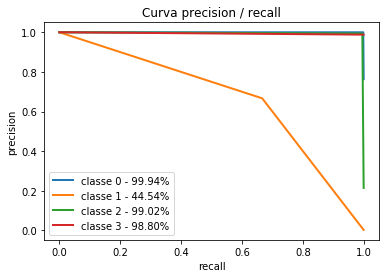

In [45]:
# Curva precision-recall

precision = dict()
recall = dict()
for i in range(4):
    precision[i], recall[i], _ = precision_recall_curve(y_test_dummies.iloc[:, i],
                                                        y_pred_dummies.iloc[:, i])
    avg_pr = average_precision_score(y_test_dummies.iloc[:, i], y_pred_dummies.iloc[:, i])
    plt.plot(recall[i], precision[i], lw=2, label=f'classe {i} - {avg_pr*100:.2f}%')
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("Curva precision / recall")
plt.show()

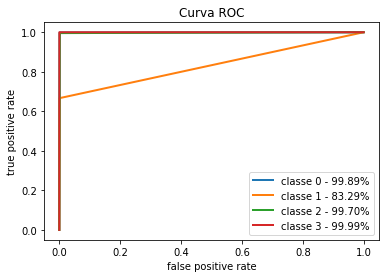

In [46]:
# Curva roc

fpr = dict()
tpr = dict()

for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_dummies.iloc[:, i],
                                  y_pred_dummies.iloc[:, i])
    auc_roc = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label=f'classe {i} - {auc_roc*100:.2f}%')

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("Curva ROC")
plt.show()